In [4]:
!git clone https://github.com/artifix3r/Deep_Learning_Arhitectures_Final_Project.git


fatal: destination path 'Deep_Learning_Arhitectures_Final_Project' already exists and is not an empty directory.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models,layers,regularizers
from tensorflow.keras.models import Model

from tensorflow.keras import backend as K

In [9]:
#Open all files

df_train = pd.read_csv('/content/Deep_Learning_Arhitectures_Final_Project/data/ECG200_TEST.tsv', sep='\t', header=None) #path to test dataset
df_test = pd.read_csv('/content/Deep_Learning_Arhitectures_Final_Project/data/ECG200_TRAIN.tsv', sep='\t', header=None) #path to train dataset

#Look at values in train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
0,1,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,0.683458,1.082088,0.722577,0.109811,-0.696609,-0.662268,-0.839985,-0.935297,-0.895362,-0.924266,-1.088177,-1.113585,-1.130681,-1.201895,-1.539509,-1.535227,-1.468417,-2.078012,-1.856547,-1.982868,-2.041212,-1.793860,-1.986162,-1.946903,-1.706593,-1.325142,-1.147066,-0.863629,-0.356015,-0.204890,...,0.463712,0.585878,0.622586,0.314033,0.421676,0.639392,0.470756,0.299982,0.247447,0.319957,0.299768,0.200925,0.152368,0.069307,0.290626,0.096217,0.379715,0.791631,0.606662,0.801544,0.696313,0.204389,0.205122,-0.045159,-0.184017,0.115775,-0.098132,-0.178360,-0.107120,-0.193491,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,1,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,-0.230098,-0.451530,0.224113,-0.550054,-0.933977,-0.841629,-0.763727,-1.390977,-0.668909,-1.180268,-1.366029,-1.003644,-1.486201,-1.423197,-1.497927,-1.530533,-1.814270,-1.964060,-1.956103,-1.934264,-1.920925,-1.984635,-1.796928,-1.717051,-1.741488,-0.676497,-0.603892,-0.594680,0.071467,0.047549,...,0.688933,0.406544,0.319476,0.725306,0.298402,0.504723,0.395827,0.399075,0.554689,0.183927,0.461040,0.106824,0.631238,0.671494,-0.106819,0.392942,0.611029,0.494914,1.028177,0.812667,0.500167,0.476564,0.432609,0.491859,0.015041,-0.098010,0.027623,-0.117590,0.106466,-0.064095,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,1,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,-0.011556,-0.151060,-0.165723,-0.149703,-0.303985,-0.439550,-0.251222,-0.226462,-0.491236,-0.718471,-0.819033,-0.742902,-0.794862,-1.005411,-0.854667,-0.664719,-0.966059,-1.250551,-1.148753,-1.081805,-1.229859,-1.329428,-1.343500,-1.388611,-1.469790,-1.529446,-1.452891,-1.438498,-1.637808,-1.637643,...,0.361909,0.523365,0.312846,0.290468,0.497942,0.504409,0.418277,0.422805,0.391918,0.386068,0.468577,0.411592,0.260108,0.341633,0.550400,0.604816,0.494183,0.386066,0.502098,0.591109,0.476200,0.660107,0.928723,0.801658,0.780144,0.934836,0.981024,1.092867,1.151628,1.203222,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,1.137943,1.046725,0.390159,-0.463177,-0.516452,-0.748172,-0.870152,-0.839930,-0.972055,-1.087207,-1.066441,-1.278173,-1.391932,-1.527656,-1.722810,-1.801991,-2.109684,-2.231006,-2.357204,-2.432272,-2.444519,-2.442007,-2.176233,-1.942050,-1.663546,-1.124193,-0.796676,-0.546558,-0.140208,0.145777,...,0.573265,0.629044,0.670985,0.613061,0.524032,0.602005,0.547952,0.499085,0.473772,0.444688,0.515292,0.383676,0.405070,0.392573,0.385344,0.359873,0.533237,0.644077,0.760671,0.660656,0.434464,0.399898,0.319325,0.233626,0.142697,0.174776,0.134232,0.055882,0.141421,0.173346,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,-1,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,0.830197,0.727048,0.648830,0.787877,0.643346,0.467292,0.319482,-0.178127,-0.589164,-0.582264,-0.656677,-0.790563,-0.786609,-0.846742,-0.872577,-0.822020,-0.863381,-0.938879,-0.986204,-1.014380,-1.044480,-1.134152,-1.234278,-1.250723,-1.220270,-1.228189,-1.255540,-1.289033,-1.349891,-1.390175,...,0.099233,0.217777,0.238587,0.290855,0.377898,0.434383,0.472361,0.466453,0.427637,0.416249,0.398286,0.376364,0.343084,0.271855,0.253910,0.250182,0.202643,0.246176,0.300655,0.216936,0.162536,0.219100,0.233445,0.210880,0.260673,0.280664,0.280145,0.322233,0.315104,0.539736,0.900511,1.278688,2.317878,2.916254,2.211947,2.034753,2.071302,1.254178,1.037879,1.009615


In [10]:
#Rename first column
df_train.rename(columns={0:'target'}, inplace=True)
df_test.rename(columns={0:'target'}, inplace=True)

df_train.head()
     

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
0,1,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,0.683458,1.082088,0.722577,0.109811,-0.696609,-0.662268,-0.839985,-0.935297,-0.895362,-0.924266,-1.088177,-1.113585,-1.130681,-1.201895,-1.539509,-1.535227,-1.468417,-2.078012,-1.856547,-1.982868,-2.041212,-1.793860,-1.986162,-1.946903,-1.706593,-1.325142,-1.147066,-0.863629,-0.356015,-0.204890,...,0.463712,0.585878,0.622586,0.314033,0.421676,0.639392,0.470756,0.299982,0.247447,0.319957,0.299768,0.200925,0.152368,0.069307,0.290626,0.096217,0.379715,0.791631,0.606662,0.801544,0.696313,0.204389,0.205122,-0.045159,-0.184017,0.115775,-0.098132,-0.178360,-0.107120,-0.193491,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,1,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,-0.230098,-0.451530,0.224113,-0.550054,-0.933977,-0.841629,-0.763727,-1.390977,-0.668909,-1.180268,-1.366029,-1.003644,-1.486201,-1.423197,-1.497927,-1.530533,-1.814270,-1.964060,-1.956103,-1.934264,-1.920925,-1.984635,-1.796928,-1.717051,-1.741488,-0.676497,-0.603892,-0.594680,0.071467,0.047549,...,0.688933,0.406544,0.319476,0.725306,0.298402,0.504723,0.395827,0.399075,0.554689,0.183927,0.461040,0.106824,0.631238,0.671494,-0.106819,0.392942,0.611029,0.494914,1.028177,0.812667,0.500167,0.476564,0.432609,0.491859,0.015041,-0.098010,0.027623,-0.117590,0.106466,-0.064095,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,1,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,-0.011556,-0.151060,-0.165723,-0.149703,-0.303985,-0.439550,-0.251222,-0.226462,-0.491236,-0.718471,-0.819033,-0.742902,-0.794862,-1.005411,-0.854667,-0.664719,-0.966059,-1.250551,-1.148753,-1.081805,-1.229859,-1.329428,-1.343500,-1.388611,-1.469790,-1.529446,-1.452891,-1.438498,-1.637808,-1.637643,...,0.361909,0.523365,0.312846,0.290468,0.497942,0.504409,0.418277,0.422805,0.391918,0.386068,0.468577,0.411592,0.260108,0.341633,0.550400,0.604816,0.494183,0.386066,0.502098,0.591109,0.476200,0.660107,0.928723,0.801658,0.780144,0.934836,0.981024,1.092867,1.151628,1.203222,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,1.137943,1.046725,0.390159,-0.463177,-0.516452,-0.748172,-0.870152,-0.839930,-0.972055,-1.087207,-1.066441,-1.278173,-1.391932,-1.527656,-1.722810,-1.801991,-2.109684,-2.231006,-2.357204,-2.432272,-2.444519,-2.442007,-2.176233,-1.942050,-1.663546,-1.124193,-0.796676,-0.546558,-0.140208,0.145777,...,0.573265,0.629044,0.670985,0.613061,0.524032,0.602005,0.547952,0.499085,0.473772,0.444688,0.515292,0.383676,0.405070,0.392573,0.385344,0.359873,0.533237,0.644077,0.760671,0.660656,0.434464,0.399898,0.319325,0.233626,0.142697,0.174776,0.134232,0.055882,0.141421,0.173346,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,-1,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,0.830197,0.727048,0.648830,0.787877,0.643346,0.467292,0.319482,-0.178127,-0.589164,-0.582264,-0.656677,-0.790563,-0.786609,-0.846742,-0.872577,-0.822020,-0.863381,-0.938879,-0.986204,-1.014380,-1.044480,-1.134152,-1.234278,-1.250723,-1.220270,-1.228189,-1.255540,-1.289033,-1.349891,-1.390175,...,0.099233,0.217777,0.238587,0.290855,0.377898,0.434383,0.472361,0.466453,0.427637,0.416249,0.398286,0.376364,0.343084,0.271855,0.253910,0.250182,0.202643,0.246176,0.300655,0.216936,0.162536,0.219100,0.233445,0.210880,0.260673,0.280664,0.280145,0.322233,0.315104,0.539736,0.900511,1.278688,2.317878,2.916254,2.211947,2.034753,2.071302,1.254178,1.037879,1.009615


In [11]:
#Printout short form of information
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  100 non-null    int64  
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
 20  20      100 non-null    float64
 21  21      100 non-null    float64
 22  22 

In [12]:

#Convert target values to useful form for training
def converter(x):
    if x < 0:
        x = 0
    return x

df_train['target'] = df_train['target'].apply(converter)
df_test['target'] = df_test['target'].apply(converter)

In [13]:
#Printout describe statistic
df_train.describe()

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.640000,0.778107,1.420520,1.930826,1.987732,1.431611,0.699987,0.182074,0.180556,0.268325,0.100887,-0.095240,-0.296454,-0.432582,-0.609654,-0.762522,-0.859458,-0.937121,-0.956791,-0.970401,-1.025613,-1.070482,-1.127013,-1.178271,-1.231038,-1.286730,-1.321581,-1.395918,-1.416992,-1.423922,-1.407927,-1.388088,-1.340133,-1.260683,-1.141041,-1.014849,-0.842235,-0.689638,-0.540271,-0.352221,...,0.461973,0.464565,0.467103,0.453088,0.442354,0.438746,0.446426,0.413466,0.417414,0.434948,0.407392,0.433591,0.399503,0.409268,0.390733,0.391893,0.434354,0.494661,0.579246,0.591035,0.550135,0.493199,0.432585,0.376223,0.319499,0.289734,0.217529,0.200118,0.220815,0.174901,0.165110,0.165051,0.227733,0.354452,0.434472,0.409830,0.395148,0.289287,0.173945,0.181157
std,0.482418,0.715291,0.944463,1.153090,1.192668,1.115741,1.176571,1.283618,1.094534,0.928217,0.905123,0.811748,0.749379,0.735774,0.689292,0.663330,0.622182,0.515996,0.491822,0.480904,0.522114,0.554731,0.648113,0.684009,0.678232,0.673892,0.670834,0.681777,0.670859,0.689022,0.744069,0.741169,0.809798,0.849031,0.813869,0.818090,0.846151,0.820317,0.828343,0.880795,...,0.346464,0.322632,0.311319,0.292525,0.276343,0.279548,0.277898,0.270567,0.246007,0.253849,0.270020,0.283666,0.280137,0.262588,0.281821,0.288558,0.315305,0.329827,0.345572,0.361703,0.323053,0.308304,0.312495,0.338801,0.384798,0.389734,0.422729,0.444324,0.414495,0.388402,0.397580,0.448105,0.515961,0.713155,0.823221,0.840228,0.811271,0.705257,0.584389,0.413389
min,0.000000,-1.668193,-2.053335,-2.235332,-2.173837,-1.741502,-1.645442,-1.962966,-2.238767,-2.071550,-2.261594,-2.445409,-2.521803,-2.670337,-2.961496,-3.014451,-2.954427,-2.533932,-2.321099,-2.401157,-2.282220,-2.257804,-2.509492,-2.521835,-2.320244,-2.342957,-2.464459,-2.560607,-2.649804,-2.453185,-2.444519,-2.442007,-2.337949,-2.235914,-2.128440,-2.110513,-2.098527,-2.017522,-2.048919,-1.964045,...,-1.327738,-1.354267,-1.268590,-1.169734,-1.163080,-1.236563,-1.273067,-1.190781,-1.022881,-0.865770,-0.781114,-0.752205,-0.729192,-0.666347,-0.535405,-0.335468,-0.320826,-0.523848,-0.363309,-0.375341,-0.435042,-0.419153,-0.574543,-0.386227,-0.562537,-0.651143,-0.677705,-0.860913,-0.685515,-0.535295,-0.741970,-0.933816,-0.702941,-0.658564,-0.749179,-0.586938,-0.953753,-1.061242,-2.023361,-1.376014
25%,0.000000,0.401561,0.854347,1.161235,1.528003,0.833111,-0.194091,-0.926596,-0.562226,-0.302227,-0.354464,-0.474429,-0.692790,-0.769447,-0.934154,-1.060476,-1.169248,-1.215745,-1.209682,-1.253835,-1.297361,-1.351496,-1.489605,-1.579383,-1.587559,-1.663164,-1.718699,-1.766631,-1.888056,-1.925678,-1.955890,-1.941057,-1.936775,-1.870950,-1.671067,-1.561559,-1.366216,-1.296665,-1.240032,-1.270390,...,0.333244,0.345216,0.339616,0.309507,0.310157,0.323305,0.319665,0.283720,0.307825,0.317252,0.270451,0.285627,0.228725,0.221658,0.224351,0.218144,0.202332,0.335473,0.388236,0.39

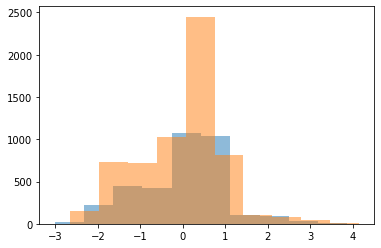

In [14]:

_ = plt.hist(df_train[df_train['target']==0].iloc[:, 1:].values.flatten(), alpha=0.5)
_ = plt.hist(df_train[df_train['target']==1].iloc[:, 1:].values.flatten(), alpha=0.5)

plt.show()

We check how many two classes are separable based on the distribution of amplitudes.



In [15]:

#Look at amount of zeros targets
zero_examples_train = df_train[df_train['target']==0].iloc[:, 1:]
zero_examples_test = df_test[df_test['target']==0].iloc[:, 1:]
x = np.arange(zero_examples_train.shape[1])

print(f'Train: {zero_examples_train.shape[0]}\nTest: {zero_examples_test.shape[0]}')

Train: 36
Test: 31


Knowing that there are only 100 examples, we see an imbalance between the classes.



In [16]:
#Merge all examples of zeros
zero_examples = np.vstack([zero_examples_train.values, zero_examples_test.values])
     

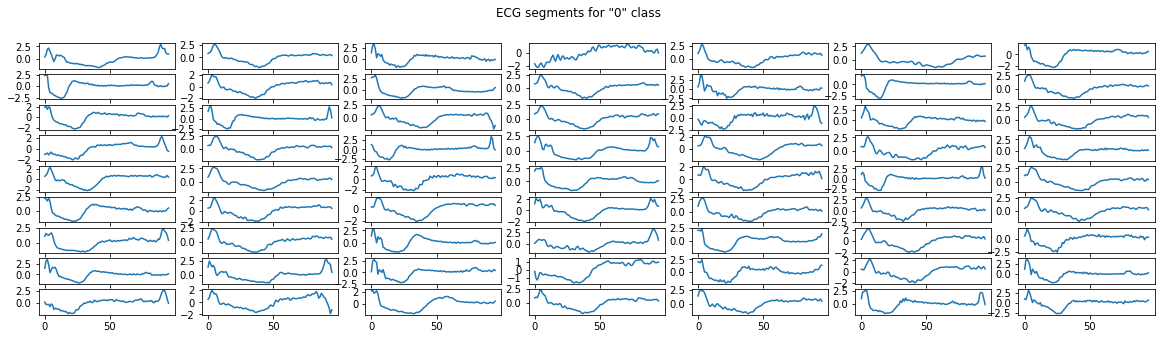

In [17]:

#Visualise zeros examples
fig, axs = plt.subplots(9, 7, figsize=(20, 5))
fig.suptitle('ECG segments for "0" class')

k = 0
for i in range(9):
    for j in range(7):
        axs[i, j].plot(x, zero_examples[k])
        k += 1
     

In [18]:
#Remove noise with help of wavelet transform
import scipy.signal

b, a = scipy.signal.butter(3, 0.4)
filtered = scipy.signal.filtfilt(b, a, zero_examples[8], method='gust')

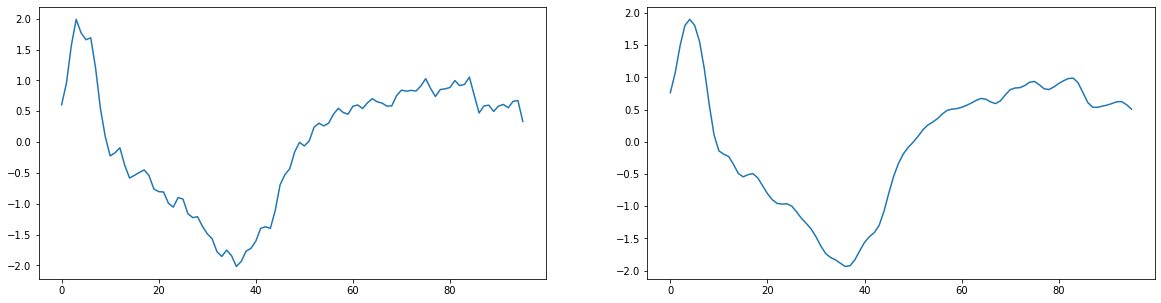

In [19]:
#Control result
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(x, zero_examples[8])
axs[1].plot(x, filtered)
     

In [20]:
#Look at amount of ones targets
first_examples_train = df_train[df_train['target']==1].iloc[:, 1:]
first_examples_test = df_test[df_test['target']==1].iloc[:, 1:]
x = np.arange(first_examples_train.shape[1])

print(f'Train: {first_examples_train.shape[0]}\nTest: {first_examples_test.shape[0]}')

Train: 64
Test: 69


In [21]:
#Merge
first_examples = np.vstack([first_examples_train.values, first_examples_test.values])

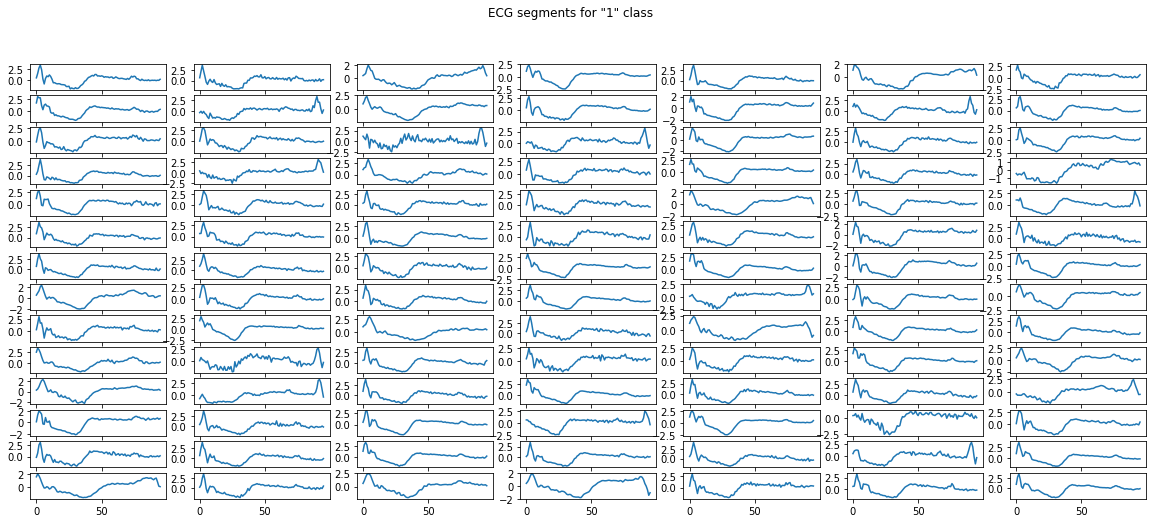

In [22]:
#Visualise
fig, axs = plt.subplots(14, 7, figsize=(20, 8))
fig.suptitle('ECG segments for "1" class')

k = 0
for i in range(14):
    for j in range(7):
        axs[i, j].plot(x, first_examples[k])
        k += 1

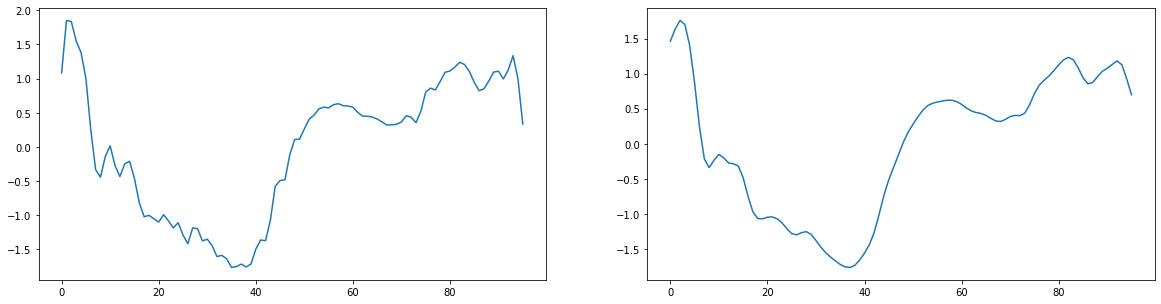

In [23]:
#Check filter function for signal
filtered = scipy.signal.filtfilt(b, a, first_examples[5], method='gust')

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(x, first_examples[5])
axs[1].plot(x, filtered)

In [24]:

#Smoothing values for decrease noise
def smoothing(x):
    b, a = scipy.signal.butter(3, 0.4)
    filtered = scipy.signal.filtfilt(b, a, x, method='gust')

    return filtered

df_train_smoothed = df_train.iloc[:, 1:].apply(smoothing, axis=1, result_type='expand')
df_test_smoothed = df_test.iloc[:, 1:].apply(smoothing, axis=1, result_type='expand')

In [25]:

zero_examples_smoothed_train = df_train_smoothed[df_train['target']==0]
zero_examples_smoothed_test = df_test_smoothed[df_test['target']==0]
zero_examples_smoothed = np.vstack([zero_examples_smoothed_train.values, zero_examples_smoothed_test.values])

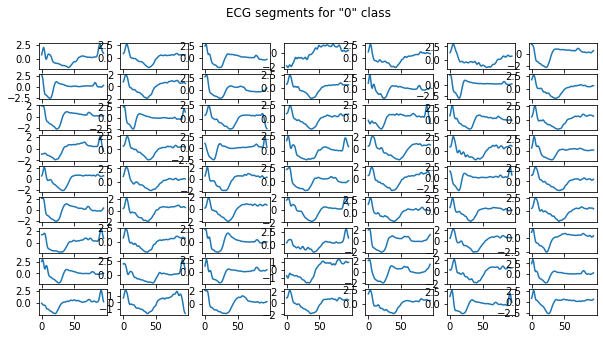

In [26]:
fig, axs = plt.subplots(9, 7, figsize=(10, 5))
fig.suptitle('ECG segments for "0" class')

k = 0
for i in range(9):
    for j in range(7):
        axs[i, j].plot(x, zero_examples_smoothed[k])
        k += 1

In [27]:
first_examples_smoothed_train = df_train_smoothed[df_train['target']==1]
first_examples_smoothed_test = df_test_smoothed[df_test['target']==1]
first_examples_smoothed = np.vstack([first_examples_smoothed_train.values, first_examples_smoothed_test.values])

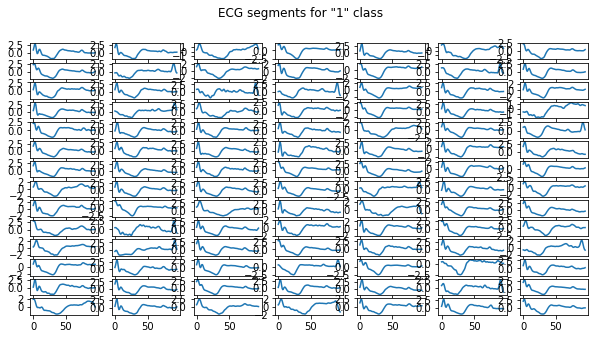

In [28]:
#Visualise
fig, axs = plt.subplots(14, 7, figsize=(10, 5))
fig.suptitle('ECG segments for "1" class')

k = 0
for i in range(14):
    for j in range(7):
        axs[i, j].plot(x, first_examples_smoothed[k])
        k += 1

## Analyze result of wavelet transform


In [29]:

zero_examples_smoothed_without_r = zero_examples_smoothed[:, 10:80]
first_examples_smoothed_without_r = first_examples_smoothed[:, 10:80]

x_without_r = np.arange(zero_examples_smoothed_without_r.shape[1])

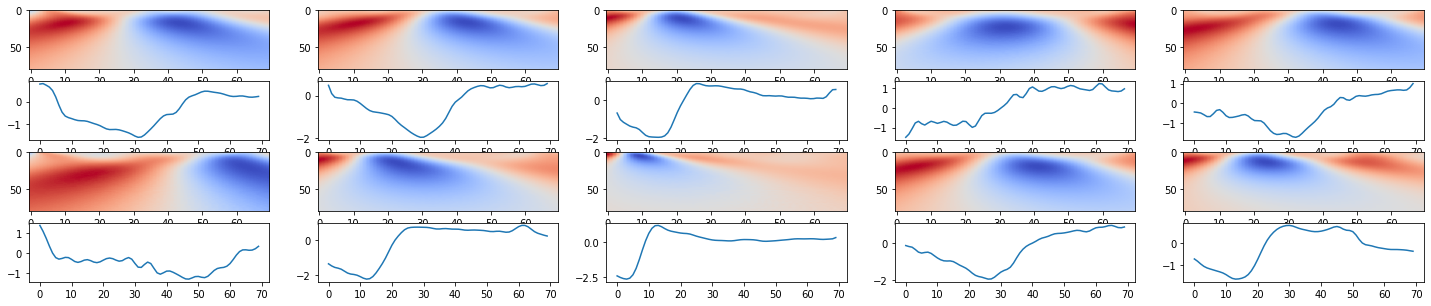

In [30]:
#Using wavelet transformation for get temporal and frequency properties
#Class 0
import pywt
    
scales = np.arange(1, 81)
wavelet = 'gaus1' 

fig, axs = plt.subplots(4, 5, figsize=(25, 5))

for i in range(10):
    if i < 5:
        coeffs, freqs = pywt.cwt(zero_examples_smoothed_without_r[i], scales, wavelet=wavelet)
        axs[0, i].imshow(coeffs, cmap ='coolwarm', aspect ='auto')
        axs[1, i].plot(x_without_r, zero_examples_smoothed_without_r[i])
    else:
        coeffs, freqs = pywt.cwt(zero_examples_smoothed_without_r[i], scales, wavelet=wavelet)
        axs[2, i%5].imshow(coeffs, cmap ='coolwarm', aspect ='auto')
        axs[3, i%5].plot(x_without_r, zero_examples_smoothed_without_r[i])
     

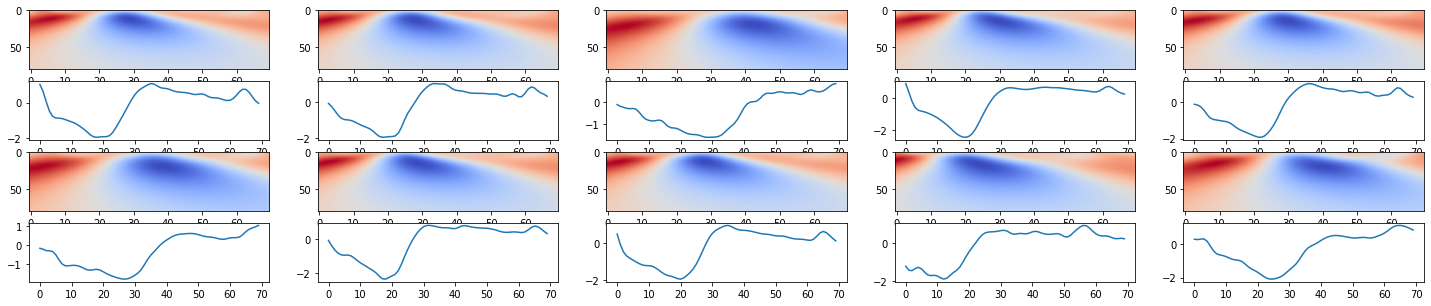

In [31]:
#Class 1
fig, axs = plt.subplots(4, 5, figsize=(25, 5))

for i in range(10):
    if i < 5:
        coeffs, freqs = pywt.cwt(first_examples_smoothed_without_r[i], scales, wavelet=wavelet)
        axs[0, i].imshow(coeffs, cmap ='coolwarm', aspect ='auto')
        axs[1, i].plot(x_without_r, first_examples_smoothed_without_r[i])
    else:
        coeffs, freqs = pywt.cwt(first_examples_smoothed_without_r[i], scales, wavelet=wavelet)
        axs[2, i%5].imshow(coeffs, cmap ='coolwarm', aspect ='auto')
        axs[3, i%5].plot(x_without_r, first_examples_smoothed_without_r[i])
     

Visually, there is no significant difference between the two classes.



In [32]:
#Get train and test datasets after transformation
import cv2

#Smoothing values for decrease noise
def wavelet_transform(x):
    scales = np.arange(1, 101)
    wavelet = 'mexh' 
    coeffs, freqs = pywt.cwt(x, scales, wavelet=wavelet)
    
    return coeffs

df_train_smoothed_wavelets = np.array([cv2.resize(wavelet_transform(df_train_smoothed.iloc[i]), [48, 48]) for i in range(df_train_smoothed.shape[0])])
df_test_smoothed_wavelets = np.array([cv2.resize(wavelet_transform(df_test_smoothed.iloc[i]), [48, 48]) for i in range(df_test_smoothed.shape[0])])
     

We will prepare a set of data for a test with the network.



In [33]:
#Normalization of values
from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = df_train.iloc[:, 1:], df_test.iloc[:, 1:], df_train.iloc[:, 0], df_test.iloc[:, 0]
X_train, X_test, y_train, y_test = df_train_smoothed, df_test_smoothed, df_train.iloc[:, 0], df_test.iloc[:, 0] #uses the smoothed set, because it gave better results

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:

X_train_wv, X_test_wv = df_train_smoothed_wavelets, df_test_smoothed_wavelets

X_train_wv = (X_train_wv - np.min(X_train_wv))/(np.max(X_train_wv) - np.min(X_train_wv))
X_test_wv = (X_test_wv - np.min(X_test_wv))/(np.max(X_test_wv) - np.min(X_test_wv))

In [35]:

#Conv blocks
def conv_block(x, filter_size, size, dropout, batch_norm=True):
    conv = layers.Conv1D(size, filter_size, padding='same', strides=1)(x)
    if batch_norm is True:
        conv = layers.BatchNormalization()(conv)
    conv = layers.Activation("relu")(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv

#Residual Conv blocks
def res_conv_block(x, filter_size, size, dropout, batch_norm=True):
    conv = layers.Conv1D(size, filter_size, padding='same', strides=1)(x)
    if batch_norm is True:
        conv = layers.BatchNormalization()(conv)
    conv = layers.Activation('relu')(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)
    conv = layers.Conv1D(size, filter_size, padding='same', strides=1)(conv)

    shortcut = layers.Conv1D(size, 1, padding='same', strides=1)(x)

    res_path = layers.add([shortcut, conv])
    res_path = layers.BatchNormalization()(res_path)
    res_path = layers.Activation('relu')(res_path)  
    res_path = layers.Dropout(dropout)(res_path)

    return res_path

I chose a block with residual connections as the main block for the network. This is due to the fact that during training with this type of data, it is necessary to take this type of block in order to prevent small values of the gradient and stabilize the training.

In [36]:

#Conv architecture
def ConvResNet(input_shape):
    FILTER_NUM = 4
    FILTER_SIZE = 35

    inputs = layers.Input(input_shape, dtype=tf.float32)

    conv_x = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout=0.3, batch_norm=True) 
    conv_x = res_conv_block(conv_x, FILTER_SIZE, FILTER_NUM*2, dropout=0.5, batch_norm=True) 
    conv_x = layers.MaxPool1D()(conv_x)
    
    flatten = layers.Flatten()(conv_x)
    predict = layers.Dense(1, activation='sigmoid')(flatten)
    model = Model(inputs, predict)

    return model

In [37]:
conv_net = ConvResNet((X_train.shape[1],1))
conv_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 96, 4)        144         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 96, 4)       16          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 96, 4)        0           ['batch_normalization[0][0]']

In [38]:

#Useful metrics for training
def precision_f(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall_f(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_f(y_true, y_pred):
    precision = precision_f(y_true, y_pred)
    recall = recall_f(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Unlike accuracy, these metrics comprehensively describe the quality of the network in this task.



In [39]:

from keras.callbacks import ModelCheckpoint

model_checkpoint_callback= ModelCheckpoint('weights.h5', verbose=1, monitor='val_f1_f', save_best_only=True, mode='max')

In [40]:
conv_net.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=3., from_logits=True), optimizer=tf.keras.optimizers.Adam(0.0001), metrics=[precision_f, recall_f, f1_f, 'accuracy'])

history = conv_net.fit(X_train,
                  y_train,
                  validation_data=(X_test, y_test),
                  steps_per_epoch=50,
                  epochs=50,
                  callbacks=[model_checkpoint_callback],
                  verbose=1)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/50 [===========================>..] - ETA: 0s - loss: 0.1530 - precision_f: 0.4271 - recall_f: 0.3854 - f1_f: 0.3819 - accuracy: 0.4792
Epoch 1: val_f1_f improved from -inf to 0.70103, saving model to weights.h5
50/50 [==============================] - 4s 19ms/step - loss: 0.1479 - precision_f: 0.4500 - recall_f: 0.4100 - f1_f: 0.4067 - accuracy: 0.5000 - val_loss: 0.0699 - val_precision_f: 0.8274 - val_recall_f: 0.6537 - val_f1_f: 0.7010 - val_accuracy: 0.6300
Epoch 2/50
42/50 [========================>.....] - ETA: 0s - loss: 0.1309 - precision_f: 0.4167 - recall_f: 0.3333 - f1_f: 0.3492 - accuracy: 0.4881
Epoch 2: val_f1_f did not improve from 0.70103
50/50 [==============================] - 0s 8ms/step - loss: 0.1243 - precision_f: 0.4100 - recall_f: 0.3500 - f1_f: 0.3533 - accuracy: 0.4900 - val_loss: 0.0659 - val_precision_f: 0.9388 - val_recall_f: 0.4837 - val_f1_f: 0.6375 - val_accuracy: 0.6100
Epoch 3/50
46/50 [==========================>...] - ETA: 0s - loss: 0.1591 - prec

In [43]:
#conv_net.save_weights('weights.h5')
conv_net.load_weights('/content/Deep_Learning_Arhitectures_Final_Project/weights/cnnnet.h5')


In [44]:
#Conv architecture
def LSTMNet(input_shape):
    inputs = layers.Input(input_shape, dtype=tf.float32)

    lstm = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
    lstm = layers.BatchNormalization()(lstm)
    lstm = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(lstm)
    lstm = layers.BatchNormalization()(lstm)
    lstm = layers.Bidirectional(layers.LSTM(32, return_sequences=False))(lstm)
    lstm = layers.BatchNormalization()(lstm)

    predict = layers.Dense(1, activation='sigmoid')(lstm)
    model = Model(inputs, predict)

    return model

In [45]:
lstmnet = LSTMNet((96, 1))
lstmnet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 96, 128)          33792     
 l)                                                              
                                                                 
 batch_normalization_4 (Batc  (None, 96, 128)          512       
 hNormalization)                                                 
                                                                 
 bidirectional_1 (Bidirectio  (None, 96, 128)          98816     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 96, 128)          512       
 hNormalization)                                           

In [46]:
lstmnet.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=0., from_logits=True), optimizer=tf.keras.optimizers.Adam(0.0001), metrics=[precision_f, recall_f, f1_f, 'accuracy'])

history = lstmnet.fit(X_train,
                  y_train,
                  validation_data=(X_test, y_test),
                  steps_per_epoch=50,
                  epochs=20,
                  callbacks=[model_checkpoint_callback],
                  verbose=1)
     

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.6771 - precision_f: 0.7000 - recall_f: 0.4700 - f1_f: 0.5467 - accuracy: 0.5600
Epoch 1: val_f1_f did not improve from 0.91209
50/50 [==============================] - 30s 346ms/step - loss: 0.6771 - precision_f: 0.7000 - recall_f: 0.4700 - f1_f: 0.5467 - accuracy: 0.5600 - val_loss: 0.6924 - val_precision_f: 0.5305 - val_recall_f: 0.4037 - val_f1_f: 0.4580 - val_accuracy: 0.5200
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.6631 - precision_f: 0.7600 - recall_f: 0.5600 - f1_f: 0.6267 - accuracy: 0.6200
Epoch 2: val_f1_f did not improve from 0.91209
50/50 [==============================] - 9s 173ms/step - loss: 0.6631 - precision_f: 0.7600 - recall_f: 0.5600 - f1_f: 0.6267 - accuracy: 0.6200 - val_loss: 0.6915 - val_precision_f: 0.6629 - val_recall_f: 0.3246 - val_f1_f: 0.4349 - val_accuracy: 0.5600
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.6317 - precision_f: 0.790

In [49]:

# net.save_weights('weights.h5')
lstmnet.load_weights('/content/Deep_Learning_Arhitectures_Final_Project/weights/lstm.h5') #load weights for network

# Result of LSTM model


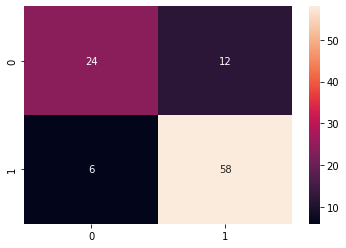

In [50]:

#Heatmap for asset perfomance working in train dataset
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = lstmnet(X_train)
conf_array = confusion_matrix(y_train, np.where(y_pred>0.5, 1, 0))
conf_train = pd.DataFrame(conf_array, columns=['0', '1'], index=['0', '1'])

_ = sn.heatmap(conf_train, annot=True)

In [51]:

from sklearn.metrics import classification_report

class_names = ['class 0', 'class 1']
print(classification_report(y_train, np.where(y_pred>0.5, 1, 0), target_names=class_names))

              precision    recall  f1-score   support

     class 0       0.80      0.67      0.73        36
     class 1       0.83      0.91      0.87        64

    accuracy                           0.82       100
   macro avg       0.81      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100



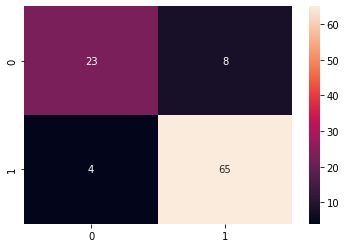

In [52]:

#Heatmap for asset perfomance working in test dataset
y_pred_test = lstmnet(X_test)
conf_array = confusion_matrix(y_test, np.where(y_pred_test>0.5, 1, 0))
conf_test = pd.DataFrame(conf_array, columns=['0', '1'], index=['0', '1'])

_ = sn.heatmap(conf_test, annot=True)

In [53]:
print(classification_report(y_test, np.where(y_pred_test>0.5, 1, 0), target_names=class_names))


              precision    recall  f1-score   support

     class 0       0.85      0.74      0.79        31
     class 1       0.89      0.94      0.92        69

    accuracy                           0.88       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.88      0.88      0.88       100



# Result of ConvRes model


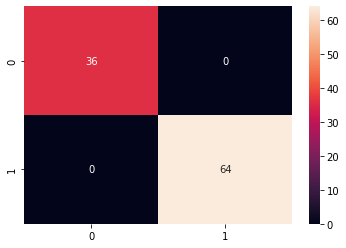

In [54]:
y_pred = conv_net(X_train)
conf_array = confusion_matrix(y_train, np.where(y_pred>0.5, 1, 0))
conf_train = pd.DataFrame(conf_array, columns=['0', '1'], index=['0', '1'])

_ = sn.heatmap(conf_train, annot=True)

In [55]:
print(classification_report(y_train, np.where(y_pred>0.5, 1, 0), target_names=class_names))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        36
     class 1       1.00      1.00      1.00        64

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



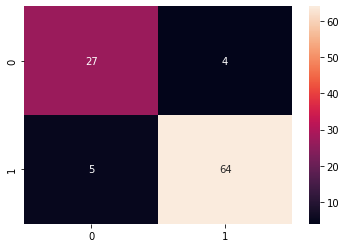

In [56]:

#Heatmap for asset perfomance working in test dataset
y_pred_test = conv_net(X_test)
conf_array = confusion_matrix(y_test, np.where(y_pred_test>0.5, 1, 0))
conf_test = pd.DataFrame(conf_array, columns=['0', '1'], index=['0', '1'])

_ = sn.heatmap(conf_test, annot=True)

In [57]:
print(classification_report(y_test, np.where(y_pred_test>0.5, 1, 0), target_names=class_names))


              precision    recall  f1-score   support

     class 0       0.84      0.87      0.86        31
     class 1       0.94      0.93      0.93        69

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



According to the results of the research conducted with different data processing options and model architectures, it can be concluded that the convolutional network model with skip connections and smoothed ECG data showed the best result compared to all previous options.